<a href="https://colab.research.google.com/github/Red-Ahmed/CSE475/blob/main/Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 :Import important Library **

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings("ignore")


**Step 2 :Load Mushroom Dataset from ZIP File**

In [ ]:
import zipfile

zip_path = "/content/mushroom.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [ ]:
import os

os.listdir("/content/")


['.config',
 'agaricus-lepiota.names',
 'Index',
 'mushroom.zip',
 'README',
 'expanded.Z',
 'agaricus-lepiota.data',
 'sample_data']

**Step 3: Load the Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/agaricus-lepiota.data", header=None)

df.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Add Column Names

In [ ]:
df.columns = [
    "class","cap-shape","cap-surface","cap-color","bruises","odor",
    "gill-attachment","gill-spacing","gill-size","gill-color",
    "stalk-shape","stalk-root","stalk-surface-above-ring",
    "stalk-surface-below-ring","stalk-color-above-ring",
    "stalk-color-below-ring","veil-type","veil-color",
    "ring-number","ring-type","spore-print-color",
    "population","habitat"
]


In [ ]:
df.shape
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Target Variable Analysis

In [ ]:
df['class'].value_counts()




,count
class,
e,4208
p,3916


In [ ]:
df['class'].value_counts(normalize=True) * 100

,proportion
class,
e,51.797144
p,48.202856


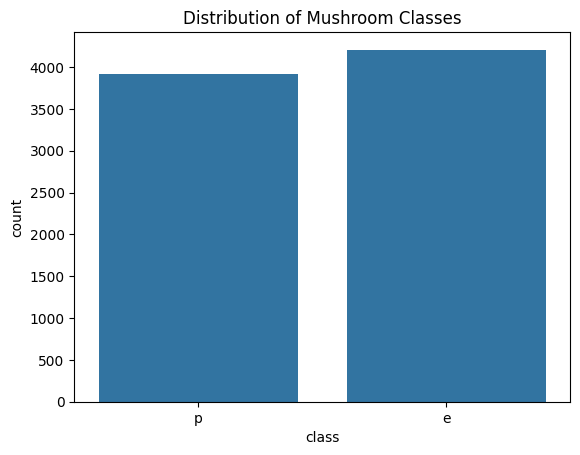

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title("Distribution of Mushroom Classes")
plt.show()


Map Labels

In [ ]:
df['class'] = df['class'].map({'e': 0, 'p': 1})


**Step 4 :Feature-wise EDA**

Odor vs Class (🔥 Strong Predictor)
Crosstab Analysis

In [ ]:
pd.crosstab(df['odor'], df['class'])


class,0,1
odor,,
a,400,0
c,0,192
f,0,2160
l,400,0
m,0,36
n,3408,120
p,0,256
s,0,576
y,0,576


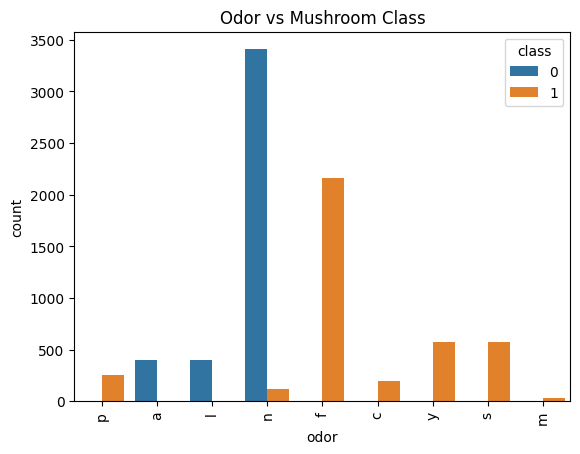

In [ ]:
sns.countplot(x='odor', hue='class', data=df)
plt.title("Odor vs Mushroom Class")
plt.xticks(rotation=90)
plt.show()


Gill Size vs Class

In [ ]:
pd.crosstab(df['gill-size'], df['class'])


class,0,1
gill-size,,
b,3920,1692
n,288,2224


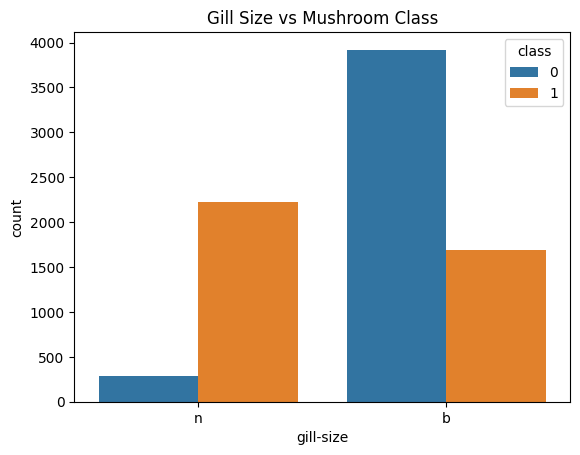

In [ ]:
sns.countplot(x='gill-size', hue='class', data=df)
plt.title("Gill Size vs Mushroom Class")
plt.show()


Bruises vs Clas

In [ ]:
pd.crosstab(df['bruises'], df['class'])


class,0,1
bruises,,
f,1456,3292
t,2752,624


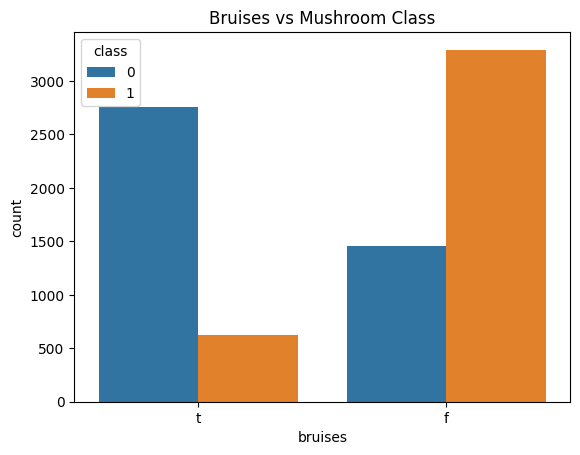

In [ ]:
sns.countplot(x='bruises', hue='class', data=df)
plt.title("Bruises vs Mushroom Class")
plt.show()


Spore Print Color vs Class

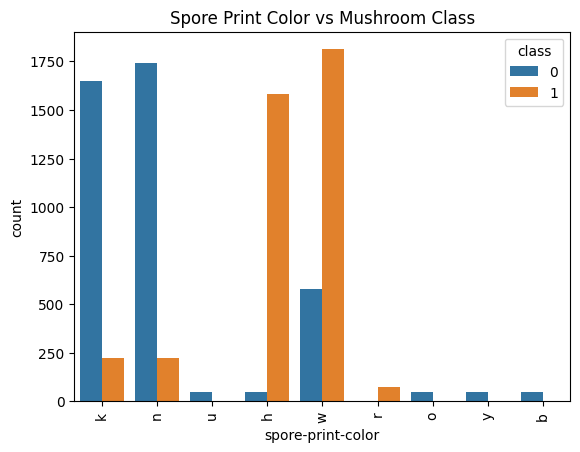

In [ ]:
pd.crosstab(df['spore-print-color'], df['class'])
sns.countplot(x='spore-print-color', hue='class', data=df)
plt.title("Spore Print Color vs Mushroom Class")
plt.xticks(rotation=90)
plt.show()


In [ ]:
df['stalk-root'].value_counts()


,count
stalk-root,
b,3776
?,2480
e,1120
c,556
r,192


**Step 5 :Data Preprocessing**

Check Data Before Encoding (Quick)

In [ ]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Encode Categorical Features (Label Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Separate Features & Target

In [ ]:
X = df.drop('class', axis=1)
y = df['class']


**Step 6 : Model Train**

Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Evaluate Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

n_estimators_list = [1, 50, 100, 150, 200, 250]
rf_results = []

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    rf_results.append([n, acc])

rf_df = pd.DataFrame(
    rf_results,
    columns=["n_estimators", "Accuracy"]
)

rf_df


,n_estimators,Accuracy
0,1,1.0
1,50,1.0
2,100,1.0
3,150,1.0
4,200,1.0
5,250,1.0


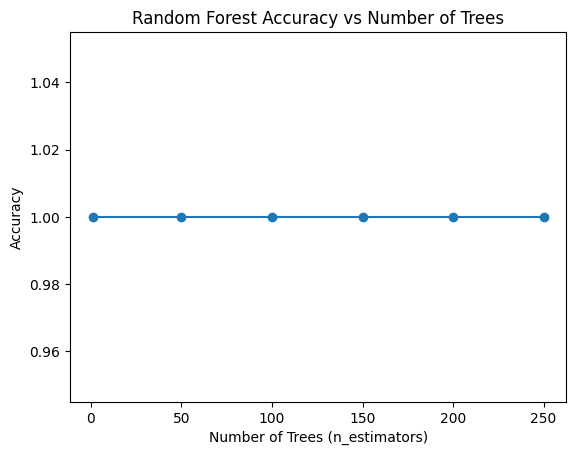

In [ ]:
import matplotlib.pyplot as plt

plt.plot(rf_df["n_estimators"], rf_df["Accuracy"], marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.show()


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

dt_acc


1.0

Train Final Random Forest (Best Value)

In [ ]:
rf_best = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_best.fit(X_train, y_train)

rf_pred = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

rf_acc


1.0

Accuracy Comparison Table

In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [dt_acc, rf_acc]
})

comparison_df


,Model,Accuracy
0,Decision Tree,1.0
1,Random Forest,1.0
